## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [7]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
df = pd.read_csv("https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz")
print("We have ", len(df['text'].unique()), "articles.")

We have  30163 articles.


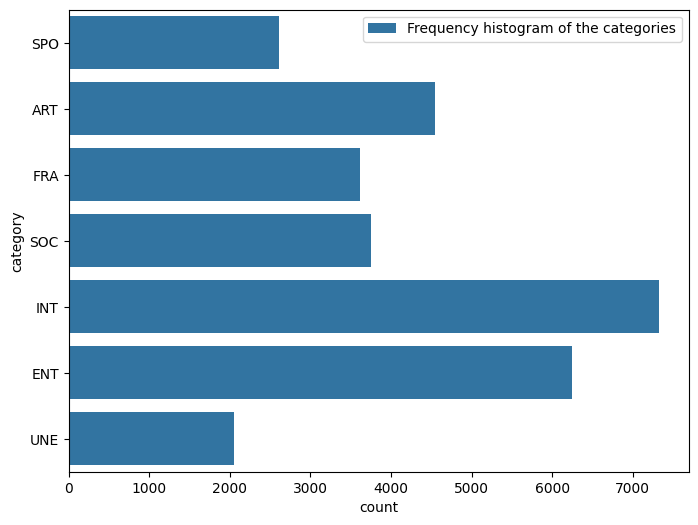

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
plt.figure(figsize = (8, 6))
sns.countplot(data = df, y = 'category', label = "Frequency histogram of the categories")
plt.show()

In [13]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
for cat in df['category'].unique():
    print(f"Here is an example of the text of an article in {cat} category. \n ")
    print(df[df['category'] == cat]['text'].sample())
    print(f"-------")

Here is an example of the text of an article in SPO category. 
 
19011    les français sébastien vieilledent et adrien hardy ont remporté la finale du deux de couple des mondiaux 2003 d'aviron devant l'italie et la république tchèque samedi 30 août à milan les vice-champions du monde 2001 apportent à la france sa première médaille d'or depuis les mondiaux 2001 à lucerne suisse où elle avait remporté les épreuves masculines du huit poids légers et du quatre barré les français ont aussi décroché le bronze du huit poids légers et terminé 4es du huit
Name: text, dtype: object
-------
Here is an example of the text of an article in ART category. 
 
9078    il a ce côté un peu buté taiseux ramassé du comédien manuel blanc dans j'embrasse pas le film d'andré téchiné blouson de cuir haut de jogging pantalon treillis noir quelque chose dans le regard clair qui regarde vers la ligne bleue des alpes sa région natale l'ain pour être précis d'ailleurs est-ce un hasard stéphane degout 27 ans le jeun

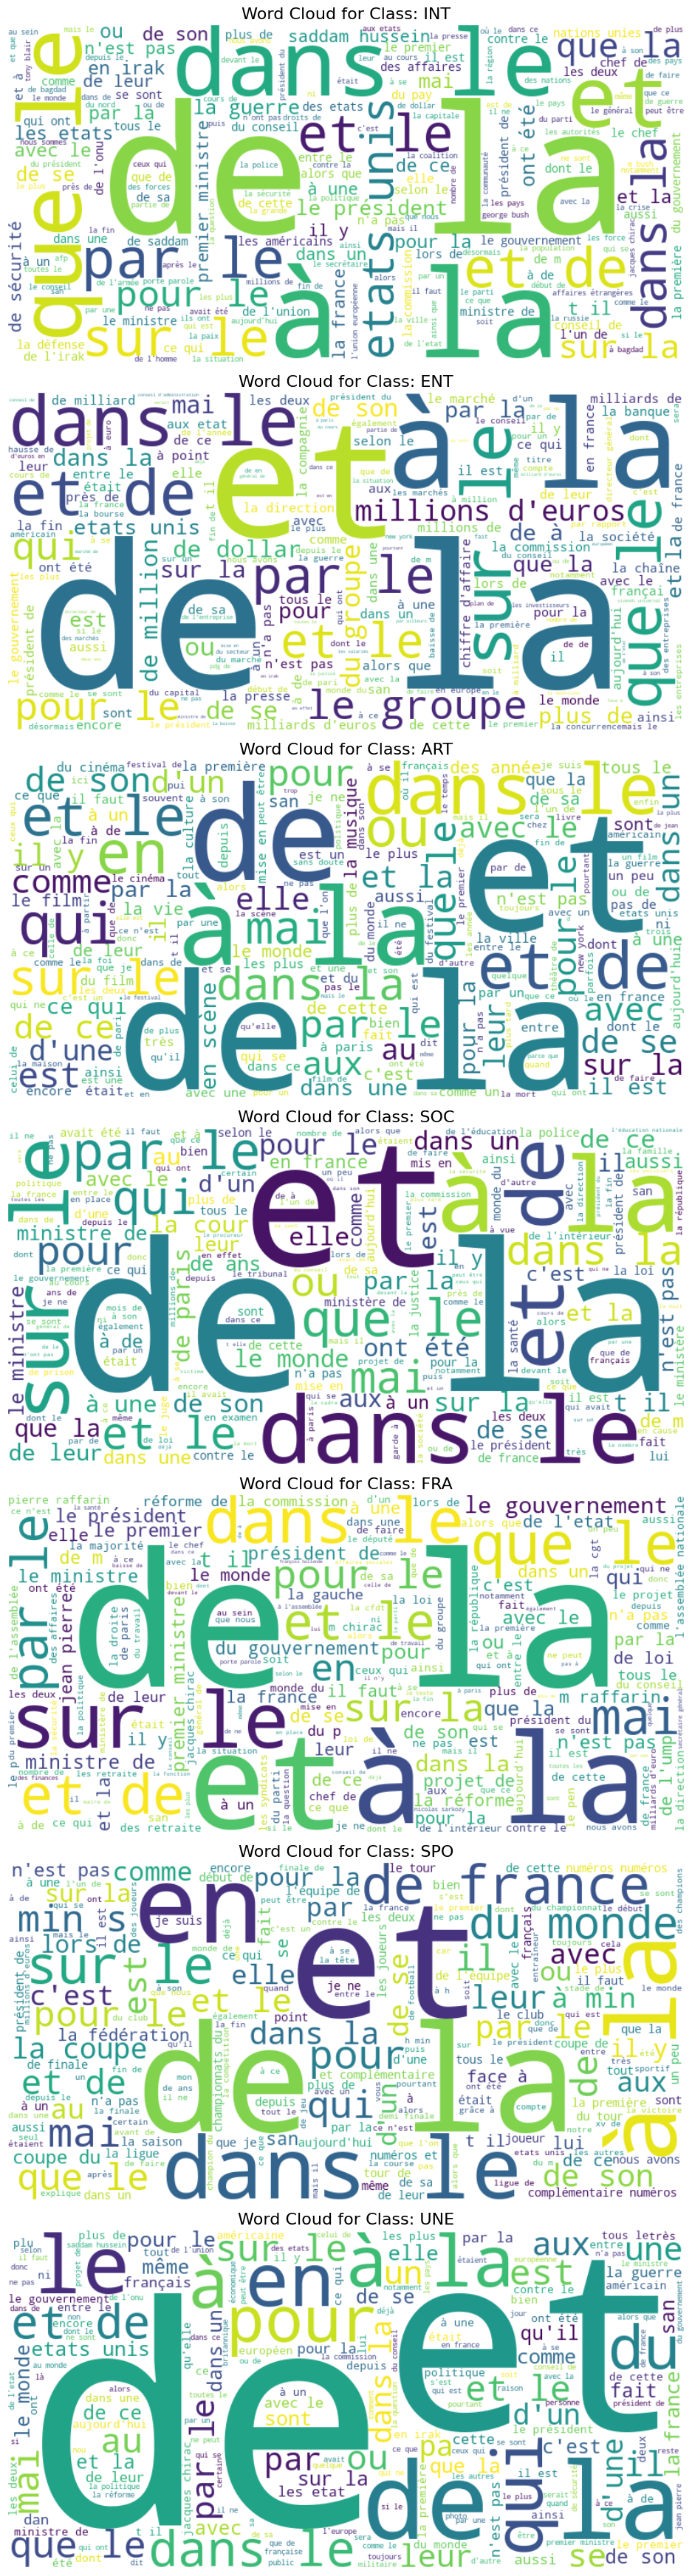

In [27]:
from wordcloud import WordCloud
from collections import Counter
# Display one wordcloud for each of the most frequent classes
class_counts = Counter(df["category"])
most_frequent_classes = [cls for cls, _ in class_counts.most_common()]
plt.figure(figsize=(10, 5 * len(most_frequent_classes)))
for i, cls in enumerate(most_frequent_classes):
    # Combine all text for this class
    class_text = " ".join(df[df["category"] == cls]["text"])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(class_text)
    
    # Display the word cloud
    plt.subplot(len(most_frequent_classes), 1, i + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Class: {cls}", fontsize=16)

plt.tight_layout()
plt.show()

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
#for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [33]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
train, temp = train_test_split(df, test_size = 0.2, stratify = df["category"])
X_train, y_train = train['text'].values, train['category'].values
dev, test = train_test_split(temp, test_size = 0.5, stratify = temp["category"])
X_dev, y_dev = dev['text'].values, dev['category'].values
X_test, y_test = test['text'].values, test['category'].values

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features = 1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
y_train_pred = clf.predict(X_train_counts)
print("Train Set Accuracy:", accuracy_score(y_train, y_train_pred))

y_dev_pred = clf.predict(X_dev_counts)
print("Dev Set Accuracy:", accuracy_score(y_dev, y_dev_pred))

Train Set Accuracy: 0.7279960218796618
Dev Set Accuracy: 0.7291114058355438


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_def_tf = tf_transformer.transform(X_dev_counts)

# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_tf, y_train)

# Evaluate 
y_train_pred = clf.predict(X_train_tf)
print("Train Set Accuracy:", accuracy_score(y_train, y_train_pred))

y_dev_pred = clf.predict(X_def_tf)
print("Dev Set Accuracy:", accuracy_score(y_dev, y_dev_pred))

Train Set Accuracy: 0.7451102270843692
Dev Set Accuracy: 0.7354111405835544


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?



Classification Report on Dev Set:
               precision    recall  f1-score   support

         SPO       0.73      0.87      0.80       455
         ART       0.75      0.85      0.80       625
         FRA       0.62      0.66      0.64       361
         SOC       0.76      0.89      0.82       733
         INT       0.65      0.56      0.60       375
         ENT       0.93      0.72      0.81       261
         UNE       0.50      0.00      0.01       206

    accuracy                           0.74      3016
   macro avg       0.71      0.65      0.64      3016
weighted avg       0.72      0.74      0.71      3016



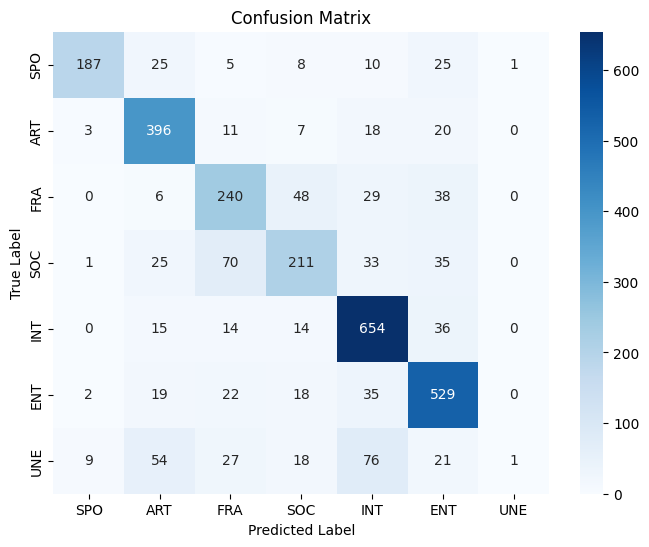

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# YOUR CODE HERE
report = classification_report(y_dev, y_dev_pred, target_names = df['category'].unique())
print("\nClassification Report on Dev Set:\n", report)

cm = confusion_matrix(y_dev, y_dev_pred, labels = df['category'].unique())

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = df['category'].unique(), yticklabels = df['category'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

/var/folders/t6/khg6jj9s4_b0lqrt24p4bvs00000gn/T/ipykernel_24583/2136630329.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bis["category"].replace({"FRA" : "MERGED", "SOC" : "MERGED"}, inplace = True)
/var/folders/t6/khg6jj9s4_b0lqrt24p4bvs00000gn/T/ipykernel_24583/2136630329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bis["

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  \
count                                                                                                                                                                                                                                                             

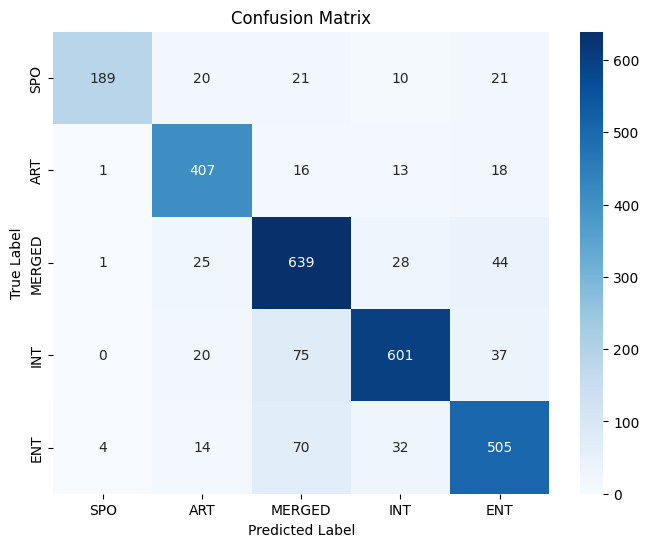

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df_bis = df[df['category'] != 'UNE']
df_bis["category"].replace({"FRA" : "MERGED", "SOC" : "MERGED"}, inplace = True)

# Plot the statistics of classes
print(df_bis.describe())

# Make the splits and print the sizes for checking
train, temp = train_test_split(df_bis, test_size = 0.2, stratify = df_bis["category"])
X_train, y_train = train['text'].values, train['category'].values
dev, test = train_test_split(temp, test_size = 0.5, stratify = temp["category"])
X_dev, y_dev = dev['text'].values, dev['category'].values
X_test, y_test = test['text'].values, test['category'].values

# Apply TfidfVectorizer
tf_TfidfVectorizer = TfidfVectorizer(max_features = 1000).fit(X_train)
X_train_tf = tf_TfidfVectorizer.transform(X_train)
X_def_tf = tf_TfidfVectorizer.transform(X_dev)

# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_tf, y_train)

# Evaluate 
y_train_pred = clf.predict(X_train_tf)
print("Train Set Accuracy:", accuracy_score(y_train, y_train_pred))

y_dev_pred = clf.predict(X_def_tf)
print("Dev Set Accuracy:", accuracy_score(y_dev, y_dev_pred))

# Print confusion matrix
cm = confusion_matrix(y_dev, y_dev_pred, labels = df_bis['category'].unique())

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = df_bis['category'].unique(), yticklabels = df_bis['category'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.